In [ ]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install scikit-learn

### Import pandas, numpy, matplotlib and sklearn

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

### Importing dataset to your code
1. read .csv file by pandas library
2. use **describe()** and **head()** functions look over dataset
3. plot **mean** and **variance** of data

                0             1
count  442.000000  4.420000e+02
mean   220.500000 -8.015207e-16
std    127.738666  4.761905e-02
min      0.000000 -9.027530e-02
25%    110.250000 -3.422907e-02
50%    220.500000 -7.283766e-03
75%    330.750000  3.124802e-02
max    441.000000  1.705552e-01
   0         1
0  0  0.061696
1  1 -0.051474
2  2  0.044451
3  3 -0.011595
4  4 -0.036385


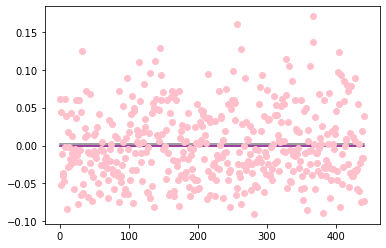

mean:-8.01520740176216e-16,variance:0.0022675736961455524


In [125]:
#Task1
data= pd.read_csv('/home/ayda/Desktop/bmi.csv') 
data.columns=['0','1']
print(data.describe())
print(data.head())
mean=data['1'].mean()
var=data['1'].var()
plt.plot([x for x in range(len(data))],[mean]*len(data),color='purple')
plt.plot([x for x in range(len(data))],[var]*len(data),color='grey')
plt.plot (data['1'] ,'o', color='pink')
plt.show()
print(f'mean:{mean},variance:{var}')

### Split data
1. using sklearn.model_selection to split your dataset (80% for training)
  * you can use numpy for spliting too

In [91]:
#Task2
import sklearn.model_selection
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split (data['0'], data['1'], train_size = 0.8)
x_train, x_test

(428    428
 160    160
 25      25
 43      43
 8        8
       ... 
 6        6
 55      55
 217    217
 188    188
 129    129
 Name: 0, Length: 353, dtype: int64,
 414    414
 105    105
 113    113
 80      80
 128    128
       ... 
 276    276
 267    267
 191    191
 206    206
 237    237
 Name: 0, Length: 89, dtype: int64)

### Linear Regression class
1. complete **fit** method
2. complete **predict** method
3. complete **mean squared error (MSE)** method

In [92]:
#Task3
class Linear_Regression:
    def __init__(self):
        self.x = None
        self.y = None
        self.alpha0 = None
        self.alpha1 = None
        self.coeffients = []
        
    def fit(self,x,y):
        self.x = x
        self.y = y     
        x_bar=self.x.mean()
        y_bar=self.y.mean()
        a=b=0
        for i in self.x.index:
            a+=(x[i]-x_bar)*(y[i]-y_bar)
            b+=((x[i]-x_bar)**2)
        self.alpha1 =a/b
        
        self.alpha0 = y_bar-self.alpha1*x_bar
        
        self.coeffients = [self.alpha0, self.alpha1]
        return self
    
    def predict(self,x):
        #x is numpy arr
        return self.alpha0+self.alpha1*x
    
    def mse(self,x,y):
        squared_error = (y - self.predict(x)) ** 2
        sum_squared_error = np.sum(squared_error)
        loss = sum_squared_error / y.size
        return loss

### Use dataset to create sample Linear regression
1. create new instance of Linear_Regression class
2. import x_train and y_train parts to fit method
3. predict new y by using x_test and predict method
4. now find how much is your MSE

In [93]:
#Task4
main=Linear_Regression()
main.fit(x_train,y_train)
y_predict=main.predict(x_test)
main.mse(x_test,y_test)

0.0021070010990202324

### Plot data and the line
1. use scatter plot to plot dataset
2. plot regression line with another color

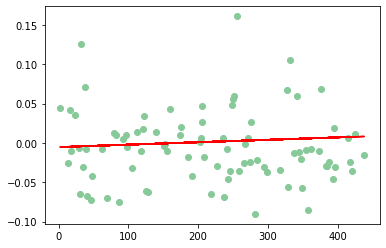

In [96]:
#Task5
import matplotlib.pyplot as plt

plt.scatter(x_test, y_test,color = '#88c999')
plt.plot (x_test, y_predict, color='red')
plt.show()